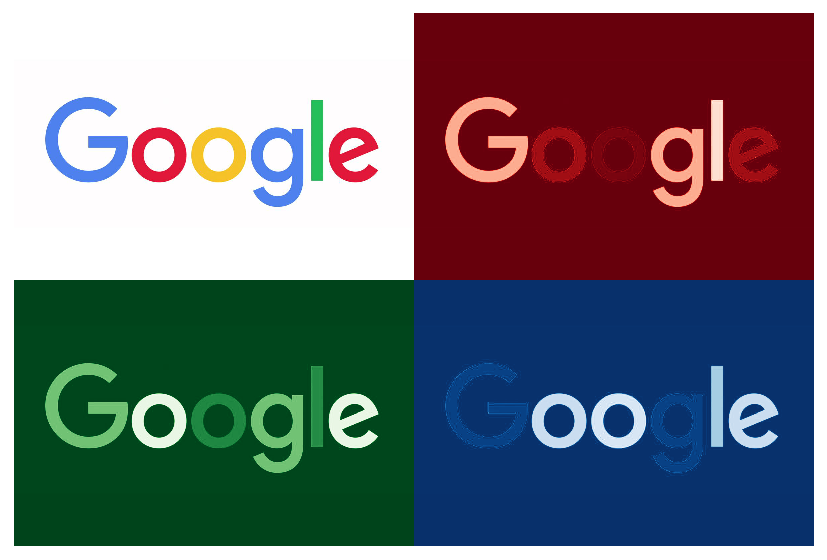

In [208]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

"""
- 우선 svg 파일을 읽을 수 없습니다. 
"""
# 샘플 그림을 그립시다. 
plt.style.use("default")
jpg_img_arr = mpimg.imread('/Users/frhyme/Downloads/google2.0.0.jpg')
"""
- png, jpg의 shape이 다름. 왜 다르지?
http://www.itworld.co.kr/news/98431
- png는 무손실압축, jpg는 손실압축, 뭐 근데 무시하고, RGB가 더 직관적이므로 그냥 이걸로 하자.
- png는 4차원인데, 이는 RGBA(red, green, blue, alpha)
- jpg는 3차원, RGB(red, green, alpha)
"""
# 어떻게 figure에 꽉 차게 그리지? 
height, width, layer = jpg_img_arr.shape
#print(jpg_img_arr.shape)

f, axes = plt.subplots(2, 2, figsize=(8, 8*height/width))
## original img plotting 
axes[0][0].imshow(jpg_img_arr[:, :, :])
axes[0][0].axis('off')
axes[0][0].set_xticks([])# 이걸 하지 않으면 tick이 남아있어서 간격이 생김. 
axes[0][0].set_yticks([])

cmaps = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues]
"""
- Red, Green, Blue로 구분하여 표현. colormap 또한, 그 형식에 맞춰서 표현 
- 실제 그림을 보면 색깔별로 어느 정도 구분되어 있는 것을 알 수 있음. 
"""
for i in range(1, 4):
    axes[i//2][i%2].imshow(jpg_img_arr[:, :, i-1], cmap=cmaps[i-1])
    axes[i//2][i%2].set_xticks([])# 이걸 하지 않으면 tick이 남아있어서 간격이 생김. 
    axes[i//2][i%2].set_yticks([])
    axes[i//2][i%2].axis('off')
plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, 
                    hspace = 0, wspace = 0)
"""
아 솔직히, 이건 어떻게 써야 되는건지 잘 모르겠음 시벌. 안해. 
- top is larger than bottom
- right is better than left 
hspace: row간의 공백 
wspace: column간의 공백
"""
plt.margins(0, 0, tight=False)
# pad_inches를 0으로 두고 저장하면, 공백없이 저장됨. 
plt.savefig("../../assets/images/markdown_img/180628_1935_google_rgb.svg", pad_inches=0)
plt.show()

In [263]:
# read svg

(480, 640, 4)


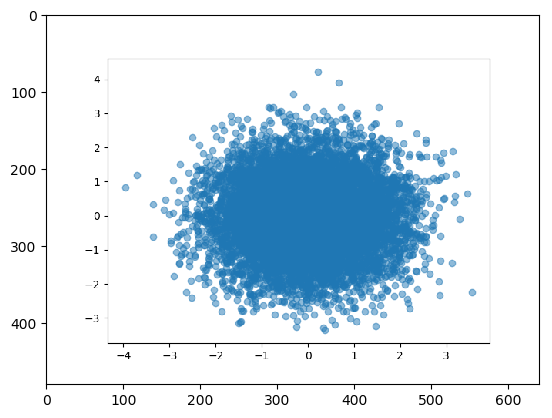

In [263]:
# Figure to np.array 
# https://matplotlib.org/gallery/misc/agg_buffer_to_array.html
import numpy as np 
import matplotlib.pyplot as plt 

def figure_to_array(fig):
    """
    plt.figure를 RGBA로 변환(layer가 4개)
    shape: height, width, layer
    """
    fig.canvas.draw()
    return np.array(fig.canvas.renderer._renderer)

f = plt.figure()
s = 10000
plt.scatter(np.random.normal(0, 1, s), np.random.normal(0, 1, s), alpha=0.5)
#plt.margins(0, 0, tight=False)
plt.close() # 쥬피터 노트북에 그림이 자동으로 뜨는 것을 막으려고 사용. 

f_arr = figure_to_array(f)
print(f_arr.shape) # 이 RGBA로 변환됨. 
plt.figure()
plt.imshow(f_arr[:, :, :])
#plt.margins(0, 0, tight=False)
plt.savefig('../../assets/images/markdown_img/180629_figure_to_nparray.svg')
#plt.show()

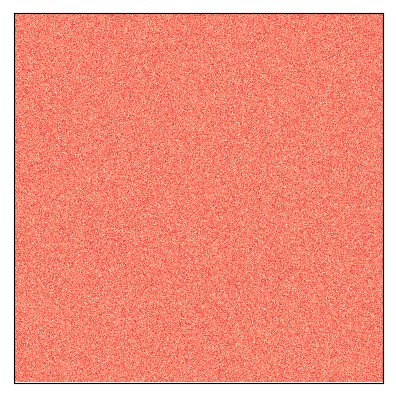

In [294]:
#cairosvg.svg2png(#url="/path/to/input.svg", write_to="/tmp/output.png")
import matplotlib.pyplot as plt
import cairosvg
import numpy as np 

w = 2048
a = np.random.normal(0, 1, w**2).reshape(w, w)
plt.imshow(a, cmap=plt.cm.Reds, alpha=0.8)
#plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.savefig("../../assets/images/markdown_img/180629_1521_simple_svg.svg")
plt.show()

cairosvg.svg2png(url="../../assets/images/markdown_img/180629_1521_simple_svg.svg", 
                 write_to="../../assets/images/markdown_img/180629_1521_simple_png.png", 
                 dpi = 100
                )